In [1]:
import os
print(os.getcwd())
if os.getcwd().endswith("combined"):
    os.chdir("..")
    os.chdir("..")
print(os.getcwd())
from src.modelling import DeepModel_Trainer
from src.augmentation import Transformer,None_Transform
from src.data_modules import DataModule,ImagesDataset
from torch import nn
import pandas as pd
import torch
from torchvision import transforms,models
import nibabel as nib
import numpy as np
from src.evaluation import Evaluation
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\j\gitlab\pro5d-classification-prolactinoma\modelling\combined
c:\Users\j\gitlab\pro5d-classification-prolactinoma


In [2]:
results = pd.read_csv(f"./modelling/mri_data/results_augmented_weighted/test_results.csv")
results["y_pred_mri"] = (results["prediction"] > 0.11) 
results_tabular = pd.read_csv(f"./modelling/tabular_data/results_csv/xgboost_prediction.csv")
results["pred_tabular"] = results_tabular["prediction"]
results["proba_tabular"] = results_tabular["proba_tabular"]

In [3]:
y_pred_tabular = results["pred_tabular"]
y_true = results["Ground_Truth"]

In [40]:
def calc_sens_spec(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    return f"sensitivity={round(sensitivity,2)}",f"specificity={round(specificity,3)}"

## Compare MRI and tabular results

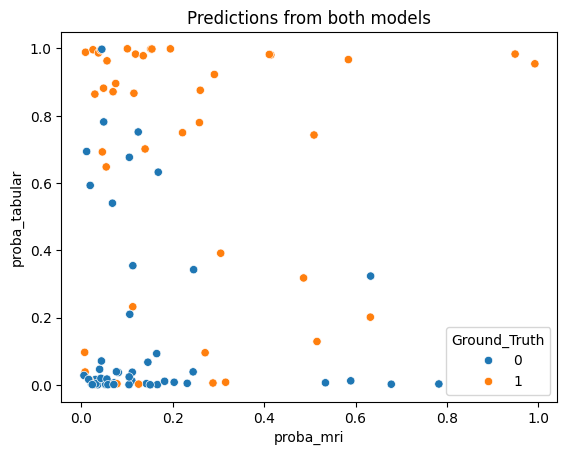

In [44]:
sns.scatterplot(x = results["prediction"],y = results["proba_tabular"],hue = results["Ground_Truth"])
plt.xlabel("proba_mri")
plt.title("Predictions from both models")
plt.show()

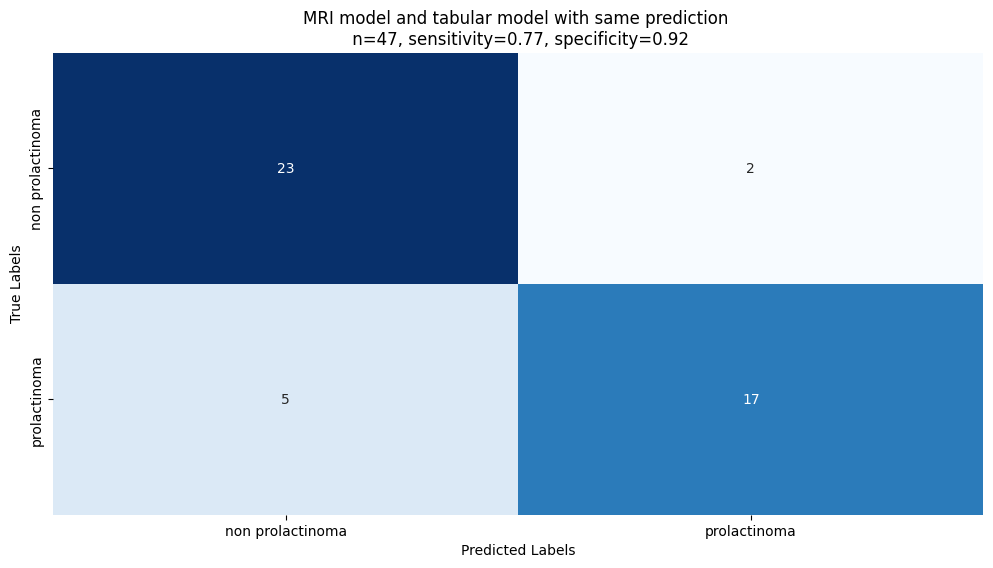

In [42]:
select_values = results["y_pred_mri"] ==  results["pred_tabular"]
y_true = results.loc[select_values,["Ground_Truth"]].values
y_pred = results.loc[select_values,["pred_tabular"]].values
conf_matrix = confusion_matrix(y_true,y_pred)
sens,spec = calc_sens_spec(conf_matrix)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            cbar=False, xticklabels=["non prolactinoma","prolactinoma"],
            yticklabels=["non prolactinoma","prolactinoma"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f"MRI model and tabular model with same prediction \n n={len(y_pred)}, {sens}, {spec}")
plt.show()

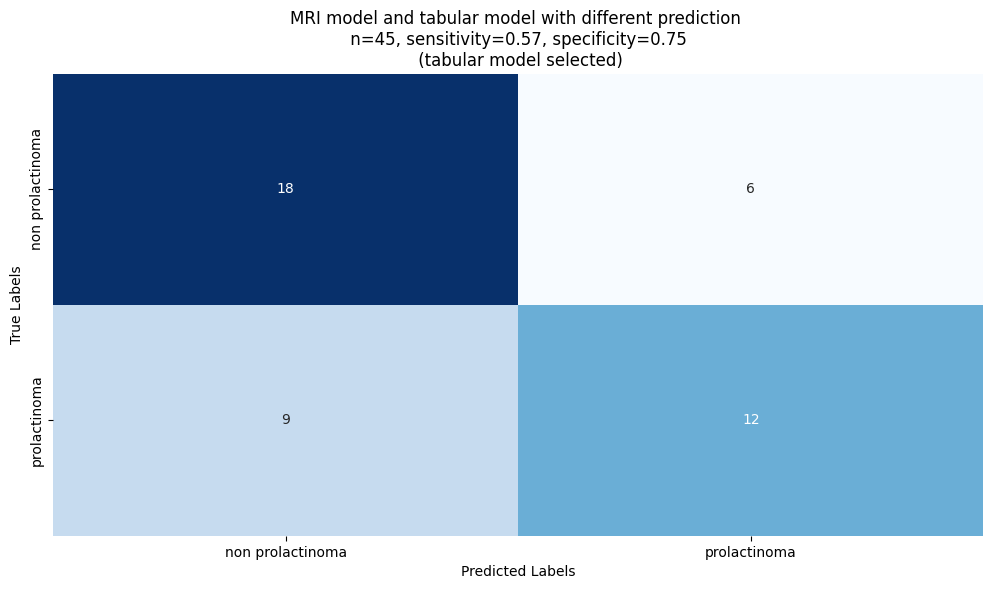

In [43]:
select_values = results["y_pred_mri"] !=  results["pred_tabular"]
y_true = results.loc[select_values,["Ground_Truth"]].values
y_pred = results.loc[select_values,["pred_tabular"]].values
conf_matrix = confusion_matrix(y_true,y_pred)
sens,spec = calc_sens_spec(conf_matrix)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            cbar=False, xticklabels=["non prolactinoma","prolactinoma"],
            yticklabels=["non prolactinoma","prolactinoma"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f"MRI model and tabular model with different prediction \n n={len(y_pred)}, {sens}, {spec} \n (tabular model selected)")
plt.show()

## Qualitative Evaluation of Tabular results

In [12]:
index_fp = np.where((y_true == 0) & (y_pred_tabular==1))[0]
index_fn = np.where((y_true == 1) & (y_pred_tabular==0))[0]
index_tp = np.where((y_true == 1) & (y_pred_tabular==1))[0]
index_tn = np.where((y_true == 0) & (y_pred_tabular==0))[0]

### True positiv

In [13]:
Evaluation().visualize_slices(fold="test",index=index_tp,preprocess_slices=Transformer.select_roi)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/ksathmed1/code/Users/pro5d-classification-prolactinoma/src/augmentation.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  slice = torch.tensor(slice).unsqueeze(0)  # Add a channel dimension


interactive(children=(IntSlider(value=14, description='mri', max=28), IntSlider(value=9, description='slice_nu…

<function src.evaluation.Evaluation.visualize_slices.<locals>.show_slice(mri, slice_number)>

### True Negativ

In [14]:
Evaluation().visualize_slices(fold="test",index=index_tn,preprocess_slices=Transformer.select_roi)

interactive(children=(IntSlider(value=20, description='mri', max=40), IntSlider(value=7, description='slice_nu…

<function src.evaluation.Evaluation.visualize_slices.<locals>.show_slice(mri, slice_number)>

### False Positiv

In [15]:
Evaluation().visualize_slices(fold="test",index=index_fp,preprocess_slices=Transformer.select_roi)

interactive(children=(IntSlider(value=3, description='mri', max=7), IntSlider(value=7, description='slice_numb…

<function src.evaluation.Evaluation.visualize_slices.<locals>.show_slice(mri, slice_number)>

### False Negativ

In [35]:
Evaluation().visualize_slices(fold="test",index=index_fn,preprocess_slices=Transformer.select_roi)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/ksathmed1/code/Users/pro5d-classification-prolactinoma/src/augmentation.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  slice = torch.tensor(slice).unsqueeze(0)  # Add a channel dimension


interactive(children=(IntSlider(value=6, description='mri', max=13), IntSlider(value=9, description='slice_num…

<function src.evaluation.Evaluation.visualize_slices.<locals>.show_slice(mri, slice_number)>